# 第5回: サポートベクターマシン

このHands-onでは下記2種類のデータを用いて，サポートベクターマシンについて体験します．

* 手書き数字画像（第4回のHands-onでも用いたデータ）
* 人工的に作られたある2次元データ

Hands-onに先立って，必要なライブラリを読み込んでおきます．

In [1]:
# 表形式のデータを操作するためのライブラリ
import pandas as pd

# 行列計算をおこなうためのライブラリ
import numpy as np

# データセット
from sklearn import datasets

# K近傍法を実行するためのクラス
from sklearn.neighbors import KNeighborsClassifier

# サポートベクターマシンを実行するためのクラス
from sklearn import svm

# 交差検証を行うためのクラス
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate

# グラフ描画ライブラリ
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

---
## 例題1: MNIST手書き数字データ

例題1では，K近傍法のHands-onで用いた[MNISTデータセット](http://yann.lecun.com/exdb/mnist/)を用いて，手書き数字の識別するサポートベクターマシン分類器を構築します．データセットの詳細は，[前回のHands-on](https://nbviewer.org/github/hontolab-courses/dmml-2021/blob/main/notebook/knn-and-ml-ops.ipynb)を参照してください．

それでは，以下のコードを実行してMNISTデータセットを読み込みましょう．

In [2]:
mnist_dataset = datasets.load_digits()
X = mnist_dataset.data
y = mnist_dataset.target

前回の「K近傍法」の授業では，機械学習を実際に行う際には
* 前処理
* 学習･評価の流れ
* 評価手法

に関するお作法があることを学びました．K近傍法や機械学習のお作法の復習のために，まずはK近傍法を使ってMNISTの分類器の構築・評価を行ってみましょう．今回は5分割交差検証を行い，評価手法にはマクロ精度（Balanced Accuracy）を用いることにします．

下記コードはMNISTデータセットにK近傍法を適用する例です．

In [3]:
# 5分割「層別化」交差検証の準備（乱数を固定）
k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=12345)

# 評価指標（マクロ精度）
score_funcs = ['balanced_accuracy']

# K近傍法のモデルの定義（K=5で設定）
K = 5
knn_model = KNeighborsClassifier(n_neighbors=K, metric="euclidean")

# 交差検証をしながら分類器を構築・評価
scores = cross_validate(knn_model, X, y, cv=k_fold, scoring=score_funcs)

# 交差検証の評価スコアを平均としてまとめる
print("Balanced accuracy: ", np.mean(scores['test_balanced_accuracy']))

Balanced accuracy:  0.9870943800943801


マクロ精度は99\%程度になりました．K近傍法でも十分な分類性能を発揮しますね．次はサポートベクターマシンで手書き数字画像の分類器を構築・評価してみましょう．

機械学習万能ライブラリである`sklearn`は，サポートベクターマシンに関するクラスも提供しています．`sklearn`ではサポートベクターマシンに関連するクラスとして
* 分類問題を扱うための`svm.SVC`クラス
* 回帰問題を扱うための`svm.SVR`クラス

の2種類を提供しています．今回は分類問題を扱うので，`svm.SVC`クラスを用います．今回はカーネルトリックは使わず，単純な線形サポートベクターマシンを使ってみましょう．

`sklearn`ライブラリを使えば，上のK近傍法コードを一行変えるだけでサポートベクターマシンによる分類器構の築・評価ができてしまいます．以下の修正したコードを確認・実行してみてください．

In [4]:
k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=12345)
score_funcs = ['balanced_accuracy']

# 線形サポートベクターマシン（ここが修正点）
svm_model = svm.SVC(kernel='linear')

scores = cross_validate(svm_model, X, y, cv=k_fold, scoring=score_funcs)
print("Balanced accuracy: ", np.mean(scores['test_balanced_accuracy']))

Balanced accuracy:  0.9787107780048956


サポートベクターマシンを用いたときのマクロ精度は98%程度になりました．MNISTデータセットの分類問題に関しては，サポートベクターマシンとK近傍法は同じくらいの性能を発揮することが分かりました．

---
## 例題2: 線形分離不可能なデータに対するサポートベクターマシン

次の例題では，人工的な2次元データの分類問題を扱います．まずは，今回の例題で用いるデータを読み込みましょう．以下のコードを実行します．

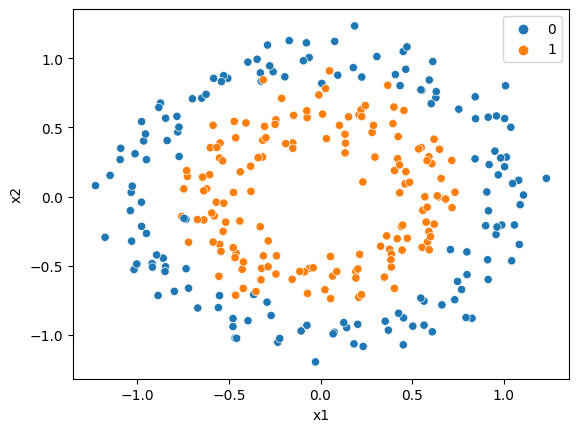

In [5]:
from sklearn.datasets import make_circles, make_moons
moons = make_circles(n_samples=300, noise=0.1, factor=0.6, random_state=777)

X = moons[0]
y = moons[1]

ax = sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
plt.show()

今回用いるデータは，授業でも扱った「ドーナツ型」のデータ分布をしています．内側にオレンジ色の点（ラベル1）が，外側に青色の点（ラベル0）が分布しています．これらデータを用いて，データがラベル1かラベル0かを分類する分類器を構築してみましょう．

まず，線形SVMを用いて分類器を構築・評価してみましょう．以下のように例題1のコードをほぼそのまま流用することで，線形SVMの学習・評価ができます．

In [6]:
k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=12345)

# 今回は評価指標として適合率（precision）と再現率（recall）を使用
score_funcs = ['precision_macro', 'recall_macro']

# 線形サポートベクターマシン（ここが修正点）
svm_model = svm.SVC(kernel='linear')

scores = cross_validate(svm_model, X, y, cv=k_fold, scoring=score_funcs)
print("Precision: ", np.mean(scores['test_precision_macro']))
print("Recall: ", np.mean(scores['test_recall_macro']))

Precision:  0.4916286178314683
Recall:  0.49333333333333335


適合率も再現率も49%ですので，デタラメにラベルを答える場合とほぼ性能が分からないと言えるでしょう．授業でも説明しましたが，素のサポートベクターマシン（線形SVM）は，今回用いるデータセットのような**線形分離不可能**な分類問題にはうまく対応できません．このような場合は，データを高次元に写像することでうまく対応できる可能性があります．

普通の流れならここでカーネルトリックを用いた非線形SVMを用いるのですが，少し寄り道をしましょう．手動でデータを高次元に写像し，そのデータに対して線形SVMを適用してみましょう．

今回用いたデータは2次元データでした．ここで，1次元目の要素を$x_1$，2次元目の要素を$x_2$としたとき，$\sqrt{x_1^2+x_2^2}$を3次元目の要素としてデータに追加しましょう．以下のコードを実行します．

In [7]:
X_new = np.insert(X, 2, np.sqrt(X[:, 0]**2+X[:, 1]**2), axis=1)

# データの末尾10件のみ表示
X_new[-10:, :]

array([[ 0.22518032,  0.8642077 ,  0.89306278],
       [ 0.96372889, -0.22060904,  0.98865653],
       [ 0.38431474, -0.4575082 ,  0.59750445],
       [ 0.23280386, -1.08479306,  1.10949251],
       [ 0.54765035, -0.73467811,  0.91633664],
       [ 0.48637921,  0.10255874,  0.49707447],
       [-1.02809832,  0.07486352,  1.0308204 ],
       [-0.84914995, -0.54263203,  1.00772276],
       [-0.69927825,  0.70696368,  0.99437805],
       [-0.4580985 , -1.02554963,  1.12321248]])

3次元目の要素がデータに追加されました．
新たに作った`X_new`を使って，再度サポートベクターマシンを適用してみましょう．以下のコードを実行します．

In [8]:
k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=12345)
score_funcs = ['precision_macro', 'recall_macro']
svm_model = svm.SVC(kernel='linear')

# XをX_newに修正
scores = cross_validate(svm_model, X_new, y, cv=k_fold, scoring=score_funcs)
print("Precision: ", np.mean(scores['test_precision_macro']))
print("Recall: ", np.mean(scores['test_recall_macro']))

Precision:  0.9636484983314795
Recall:  0.9633333333333335


適合率も再現率も大幅に向上しました．今回のデータは円の形に分布していたので，3時限目のデータとして円の半径に相当するような要素を追加しました．それが功を奏して分類器の性能が向上したわけです．しかし通常，このような都合の良いの高次元写像を地力で見つけるのは容易ではありません．

こんなときに有用なのが**カーネルトリックを用いた非線形SVM**です．例題の締めとして，**RBFカーネルを用いた非線形SVM**による分類器の構築・評価を行ってみましょう．

`sklearn`ライブラリを用いれば，非線形SVMも簡単に実行できてしまいます．今回はパラメータチューニングはせず，デフォルトの状態でRBFカーネルを用いてみましょう．以下のコードを実行して，（手動で高次元化していない）元のデータを用いた学習・評価を行います．

In [9]:
k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=12345)
score_funcs = ['precision_macro', 'recall_macro']

# カーネルにRBFカーネルを指定
svm_model = svm.SVC(kernel='rbf')

# X_newはXに戻した
scores = cross_validate(svm_model, X, y, cv=k_fold, scoring=score_funcs)

print("Precision: ", np.mean(scores['test_precision_macro']))
print("Recall: ", np.mean(scores['test_recall_macro']))

Precision:  0.9638575268817204
Recall:  0.9633333333333335


データを手動で高次元空間に写像しなくても，RBFカーネルが良い具合に振る舞ってくれました．